In [6]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c cifar-10

 91% 654M/715M [00:06<00:01, 54.9MB/s]
100% 715M/715M [00:06<00:00, 109MB/s] 


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 21.7 MB/s eta 0:00:00


In [13]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


## Importing the Dependencies

In [15]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
filenames = os.listdir('/content/train')

In [17]:
type(filenames)

list

In [18]:
len(filenames)

50000

In [19]:
print(filenames[0:5])
print(filenames[-5:])

['7511.png', '9976.png', '2459.png', '18051.png', '49418.png']
['41825.png', '2519.png', '29912.png', '21374.png', '34580.png']


## Labels Processing

In [20]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [21]:
labels_df.shape

(50000, 2)

In [22]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df[labels_df['id'] == 36537]

,id,label
36536,36537,deer


In [24]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [25]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [26]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [27]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [28]:
# Converting the 10 labels to numerical values
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


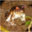

In [30]:
# Displaying sample images
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

img = cv2.imread('/content/train/1.png')
cv2_imshow(img)

In [31]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


## Image processing

In [32]:
# Convert images to numpy arrays

train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [33]:
type(data)

list

In [34]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
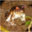

In [35]:
data[0]

In [36]:
# Covert images and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [37]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000,)


## Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [40]:
# Normalize the the data
X_train_scale = X_train/255
X_test_scale = X_test/255

## Building the Neural Network

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 10

# Setting up layers of neural network

model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
]
)

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.2106 - loss: 2.0837 - val_acc: 0.2855 - val_loss: 1.8938
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3092 - loss: 1.8752 - val_acc: 0.3122 - val_loss: 1.8714
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3311 - loss: 1.8305 - val_acc: 0.3260 - val_loss: 1.8217
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3393 - loss: 1.8016 - val_acc: 0.3475 - val_loss: 1.8008
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.3493 - loss: 1.7828 - val_acc: 0.3577 - val_loss: 1.7821
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3572 - loss: 1.7682 - val_acc: 0.3515 - val_loss: 1.8015
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3617 - loss: 1.7447 - val_acc: 0.3587 - val_loss: 1.7720
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3606 - loss: 1.7457 - val_acc: 0.3465 - val_loss: 1.7978
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

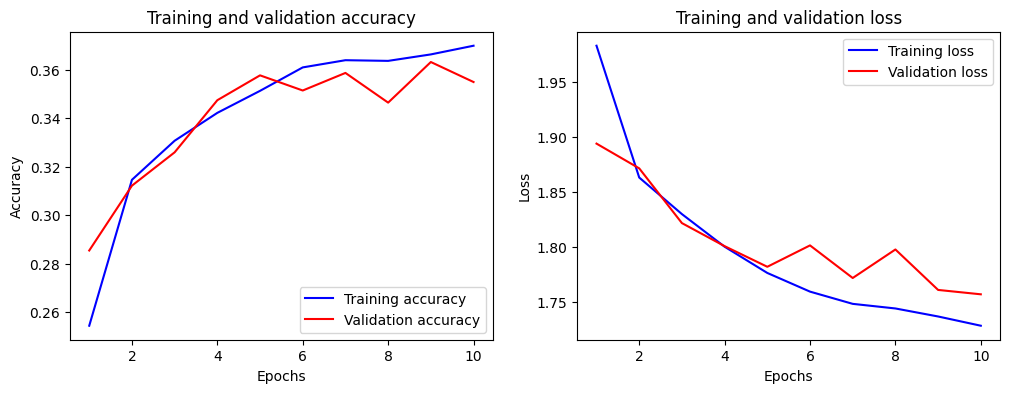

In [44]:
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=10)
# Plotting the accuracy and loss of the first model

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Neural Network with Pretrain Model ResNet50

In [45]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [46]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3)) # Include_top = False drop the final output layer
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [47]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) # Add a layer to the model
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [48]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [49]:
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 445s 348ms/step - acc: 0.3149 - loss: 2.1003 - val_acc: 0.7548 - val_loss: 0.9065
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 404s 338ms/step - acc: 0.6507 - loss: 1.1198 - val_acc: 0.8842 - val_loss: 0.4570
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 346ms/step - acc: 0.7879 - loss: 0.7765 - val_acc: 0.9078 - val_loss: 0.3717
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 346ms/step - acc: 0.8562 - loss: 0.5922 - val_acc: 0.9227 - val_loss: 0.3027
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 339ms/step - acc: 0.9016 - loss: 0.4550 - val_acc: 0.9290 - val_loss: 0.2652
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 347ms/step - acc: 0.9301 - loss: 0.3572 - val_acc: 0.9327 - val_loss: 0.2545
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 346ms/step - acc: 0.9493 - loss: 0.2856 - val_acc: 0.9360 - val_loss: 0.2385
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 346ms/step - acc: 0.9606 - loss: 0.2362 - val_acc: 0.9398 - val_loss: 0.2297
Epoch 9/

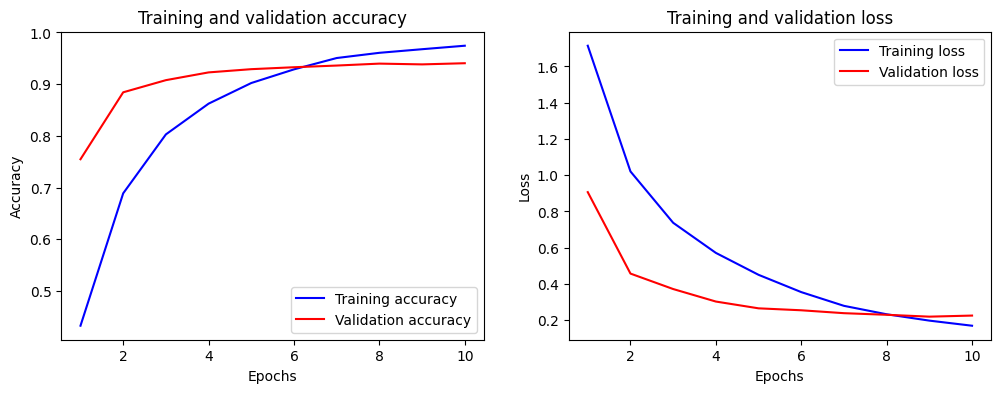

In [50]:
# Plotting the accuracy and loss of the first model

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [55]:

loss, accuracy = model.evaluate(X_test_scale, Y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - acc: 0.9370 - loss: 0.2273
Test Loss: 0.2323
Test Accuracy: 0.9366


## Building the Predictive System

In [53]:
# Function to make predictions

def predict_image(image_path):
  img = Image.open(image_path)
  # Resize the image to the input size of the ResNet50 model (256x256)
  img = img.resize((32, 32))
  img = np.array(img)
  # Add a batch dimension to the image array
  img = np.expand_dims(img, axis=0)
  # Normalize the image data
  img = img / 255.0

  # Make the prediction
  prediction = model.predict(img)

  # Get the predicted class index
  predicted_class_index = np.argmax(prediction)

  # Map the predicted class index back to the label
  labels_list = list(labels_dictionary.keys())
  predicted_label = labels_list[predicted_class_index]

  return predicted_label

In [54]:
# Example usage: Predict the class of a user-provided image

# Get the image path from the user
image_path = input("Enter the path to the image: ")

predicted_label = predict_image(image_path)
print(f"The predicted label for the image is: {predicted_label}")

Enter the path to the image: /content/93557-004-13E80176.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
The predicted label for the image is: airplane
